## <center> Capstone Project 1 Draft <center>

This is the first capstone project for Springboard Data Science Online bootcamp. Data from the Kaggle [Credit Card Fraud Detiction](https://www.kaggle.com/c/ieee-fraud-detection). The first thing I want to know is learn more about my data and answer the following questions:
1. Can I count something interesting?
2. Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
3. Can I make a bar plot or a histogram?
4. Can I compare two related quantities?
5. Can I make a scatterplot?
6. Can I make a time-series plot?
7. Looking at the plots, what are some insights I can make? Do I see any correlations? Is there a hypothesis to investigate further? What other questions do the insights lead to?
8. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships will make the story more complete?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

test_identity = pd.read_csv('data/test_identity.csv')
test_transaction = pd.read_csv('data/test_transaction.csv')
train_identity = pd.read_csv('data/train_identity.csv')
train_transaction = pd.read_csv('data/train_transaction.csv')

In [12]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


According to the transaction dataframe shown above:
1. TransactionDT: timedelta from a given reference datetime (not an actual timestamp. (TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so the unit is seconds. The maximum value of TransactionDT is 15811131, so the data if from 183 days)
2. TransactionAmt: transaction payment amount in USD
3. ProductCD: product code, the product for each transaction.(The product purchased in this transaction, it can be any kind of products such as a service.)
4. card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
5. addr1: billing region, I think it's the area code, first three number of zip code.
6. addr2: billing country
7. dist: distance. (distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.)
8. P_emaildomain: purchase email domain. (gmail.com, yahoo.com, other)
9. R_emaildomain: recipient email domain. (gmail.com, null, other)
10. C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
11. D1-D15: timedelta, such as days between previous transaction, etc.
12. M1-M9: match, such as names on card and address, etc.
13. Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations. (For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.)

In [13]:
print(train_transaction.TransactionDT.max())
print(15811131/86400)

15811131
182.99920138888888


In [14]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


According to the identity dataframe above:
1. Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
2. id_01 to id_20: are collected from Vesta
3. id_21 to id_30: are collected from sourceA
4. id_31 to id_38: are collected from sourceB
5. id_30: different systems such as ios or windows
6. id_31: browsers such as chrome or safari.
7. DeviceType: mobile or desktop.
8. DeviceInfo: 

In [15]:
print(test_identity.shape)
print(test_transaction.shape)
print(train_identity.shape)
print(train_transaction.shape)

(141907, 41)
(506691, 393)
(144233, 41)
(590540, 394)


In [16]:
print(test_identity.DeviceType.value_counts())
print(test_identity.DeviceInfo.value_counts())

desktop    74403
mobile     62528
Name: DeviceType, dtype: int64
Windows        44988
iOS Device     18720
MacOS          11149
Trident/7.0     4890
rv:11.0          749
               ...  
BV8000Pro          1
SM-N900T           1
D5303              1
NX551J             1
SM-J530L           1
Name: DeviceInfo, Length: 2226, dtype: int64


In [17]:
print(train_identity.DeviceInfo.isna().sum())

25567


In [18]:
print(train_transaction.isFraud.isna().sum())

0


In [22]:
train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [23]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [52]:
print(train_transaction.card4.isna().sum())
print(train_transaction.card4.value_counts())
new_card4 = pd.get_dummies(train_transaction.card4)
new_card4.head()

1577
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64


,american express,discover,mastercard,visa
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0


In [86]:
print(train_transaction.card6.isna().sum())
print(train_transaction.card6.value_counts())
new_card6 = pd.get_dummies(train_transaction.card6)
new_card6.head()

1571
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


,charge card,credit,debit,debit or credit
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [60]:
import scipy.stats as stat
mean1 = train_transaction.card2.mean()
y1 = train_transaction.card2.fillna(mean1)
pearson12 = stat.pearsonr(train_transaction.card1, y1)
mean3 = train_transaction.card3.mean()
y3 = train_transaction.card3.fillna(mean3)
pearson13 = stat.pearsonr(train_transaction.card1, y3)
mean5 = train_transaction.card5.mean()
y5 = train_transaction.card5.fillna(mean5)
pearson15 = stat.pearsonr(train_transaction.card1, y5)
pearson23 = stat.pearsonr(y1, y3)
pearson25 = stat.pearsonr(y1, y5)
pearson35 = stat.pearsonr(y3, y5)
print('Pearson correlation coefficient of card 1 and card 2 is: ' + str(pearson12))
print('Pearson correlation coefficient of card 1 and card 3 is: ' + str(pearson13))
print('Pearson correlation coefficient of card 1 and card 5 is: ' + str(pearson15))
print('Pearson correlation coefficient of card 2 and card 3 is: ' + str(pearson23))
print('Pearson correlation coefficient of card 2 and card 5 is: ' + str(pearson25))
print('Pearson correlation coefficient of card 3 and card 5 is: ' + str(pearson35))

Pearson correlation coefficient of card 1 and card 2 is: (0.004919274027430538, 0.00015663338514071518)
Pearson correlation coefficient of card 1 and card 3 is: (0.00296096418199345, 0.022881916295544726)
Pearson correlation coefficient of card 1 and card 5 is: (-0.09332299986734767, 0.0)
Pearson correlation coefficient of card 2 and card 3 is: (0.02377346783277675, 1.3919022753837094e-74)
Pearson correlation coefficient of card 2 and card 5 is: (0.030179764739317376, 4.841598053747038e-119)
Pearson correlation coefficient of card 3 and card 5 is: (-0.15812277727608143, 0.0)


#### We noticed that there's weak relations between different card.

In [121]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
x = train_transaction['isFraud'].value_counts().index
y = train_transaction['isFraud'].value_counts().values
trace2 = go.Bar(
     x=x ,
     y=y,
     marker=dict(
         color=y,
         colorscale = 'peach',
         reversescale = True
     ),
     name="Imbalance",    
 )
layout = dict(
     title="Imbalanced Data -- isFraud",
     xaxis=go.layout.XAxis(
     automargin=True),
     yaxis=dict(
         showgrid=False,
         showline=False,
         showticklabels=True,
     ), 
)
fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

#### According to the plot, we noticed that our labeled data is imbalance data. This may infulence our prediction result.

In [122]:
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

In [123]:
def make_day_feature(df, offset=0, tname='TransactionDT'):

    days = df[tname] / (3600*24)        
    encoded_days = np.floor(days-1+offset) % 7
    return encoded_days

def make_hour_feature(df, tname='TransactionDT'):
    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

Text(0, 0.5, 'Number of transactions')

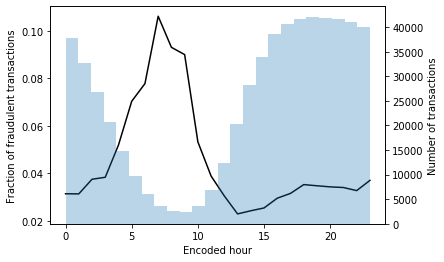

In [124]:
train['hours'] = make_hour_feature(train)
plt.plot(train.groupby('hours').mean()['isFraud'], color='k')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(train['hours'], alpha=0.3, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')

ax2.set_ylabel('Number of transactions')

#### From the transactions time-series graph, I conclude that the fraud actions always happening between less transaction time.